# Chapter 6: High Performance Computing
Module 5 of Phys212/Biol212 class
### by Ilya Nemenman, 2016-2020

## Defining High Performance Computing

Nowadays news are full with articles about new technological breakthroughs in artificial intelligence: self-driving cars, automatic translation, and even computer-generated art. What makes all of this possible, among other things, is a dramatic increase in our computational capabilities in the last decade. Interestingly, the speed of computer processors has not changed that much over this time -- an individual processor now is only a bit faster than is used to be ten years ago. What has changed is that we figured out how to put more processors into a single computer (and sometimes dramatically more -- literally thousands of specialized processors in some video cards) and how to make all of these processors to work collectively on solving large computational problems we want to solve. In this module, we discuss the basics of such parallel computing and will figure out how to implement it on your laptops.

<font color='pink'>**ToDo**: need to expand the introduction by adding a few paragraphs on history of HPC</font>

What is high performance computing? To answer this, we need to define a series of terms. 
 - **<font color='red'>Processor</font>**, or Central Processing Unit (**CPU**): The *brain* of the computer, the part in which most computing operations are controlled and executed. 
 - **<font color='red'>Serial Processing</font>**: Execution of a single program step by step on one CPU.
 - **<font color='red'>Sequential Processing</font>**: Execution of multiple programs on a single CPU in a sequence.
 - **<font color='red'>Concurrent Processing</font>**: Execution of multiple programs at the same time. 
 - **<font color='red'>Parallel Processing</font>**: Execution of multiple programs (or parts of the same one) on multiple CPUs. 
 - **<font color='red'>High Performance Computing</font>**: It is basically another name for solving computational problems concurrently on multiple CPUs.
Note that different books define some of these terms differently. However, for this class, we will stick with the definitions above.
 
It gets a bit more complicated than these simple definitions. For example, one can have serial and sequential processing (completing one task before starting the other on a single CPU). One can also have serial and concurrent processing (alternating between two or more tasks on the same single CPU). Finally, one can have true parallel and concurrent processing, which means executing multiple tasks simultaneously at the same instant of time on multiple CPUs.
<font color='pink'>**ToDo**: Show picture of different execution formats</font>

### Organization of Parallel Computing
What are the different ways of organizing parallel processing? We can develop the intuition by considering how you can arrange for multiple people in a group to do a certain complex task that consists of many different subtasks. For example, let's suppose that a group of people are arriving to a supermarket to buy a long list of supplies for a party. It seems reasonable to suppose that many people should be able to complete the shopping process faster than one, but this would require some additional organization to split the overall shopping list into sub-components. How can we organize people to do this? There are many different ways of doing this.
 - The simplest option is not to delegate different parts of the shopping list to different people, but to have just one person to complete all of the steps of the task, while others wait. This is equivalent to sequential processing. The advantages are clearly seen -- we do not need to think how to delegate tasks. Thus, for a short shopping list, this may be the fastest solution -- instead of spending time figuring out who buys what, one person quickly runs into the store and returns. However, for long shopping lists, the disadvantage is also clear -- we are not using the additional processing power of the entire team, and hence get no speedup compared to how long it would take a single person to shop.
 - The second option is to have the group captain assign a list of subtasks to each of the people in the group, and let them all focus on each of their assigned tasks. This incurs communication cost. First, the partitioning of the full list of tasks into pieces must be done, and then these sublists must be communicated to the people.  When they complete their individual tasks, the results of the completion must be communicated to the leader. This communication/organization takes time in its own right, and may make parallel processing not very efficient. Further, there are additional inefficiencies. While the task is being partitioned, the people will be waiting for their assignments, doing nothing. Then some of them will finish their subtasks before the others, and will again wait, doing nothing. However, for a long shopping list, with a smart enough partitioning of tasks that tries to balance the complexity of individual assignments, such parallel shopping can result in a substantial speedup.
 - To avoid wasting time when an individual completes their task, the arrangement above may possibly be improved. For example, when a person finishes his/her task, s/he may be asked to help the others who are still doing theirs. However, this is easier said then done. Whom should they help? To know this, each person must be constantly communicating his/her progress, either broadcasting it to everyone in the group, or at least sending it to the captain. In the former case, everyone would know who needs help. In the latter, everyone who needs more work would contact the capatain for additional instructions. In either case, communication would become a significant bottleneck: either everyone is listening to messages from everyone else (potentially having little time to do actual work!), or a captain may get overwhelmed in keeping track of everyone's progress. In addition, in either case, when help arrives, the task of a worker who is running behind needs to be partitioned again, which will take yet additional time and resources. At some point all of these communication costs may not be worth it!
 - To avoid some of these problems, one may want to duplicate the tasks originally, but prioritize them, so that every person first works on his/her task. And when those are completed, one then switches on the next pre-assigned task, constantly reporting progress. You can fill in the gaps of what kind of problems -- and which communication costs -- this solution carries.
 - Another interesting approach to explore is to have a more hierarchical structure of parallel processing. The first agent may look at the shooping list, and decide that the list is too long to be shopping alone. The agent then divides the list in half, and recruits one additional helper and gives half of the list to him/her. Then the process repeats: both the original agent and the recruit evaluate their capabilties against the job assigned to them, and, if needed, divide their list further into two parts, and recruit additional helpers. This goes on and on, until either the individual shopping assignements are small enough so that recruiting additional help is useless, or until no more free helpers are left. Again, you can fill in the gaps regarding which kind of problems one would experience with this solution
 
>### Your turn 6.1
Can you suggest other arrangements of how the tasks can be divided over multiple individuals?

Note that, in all of these suggestiong (and any of your additional ones), the more complicated the arrangement is, the more communication needs to be done. And communication takes time -- so that, at a certain point, communication costs outweigh the savings one will generate from a complex task-partitioning scheme. This is, unfortunately, the law of parallel processing: simple parallel schemes are inefficient because they do not utilize all of the available resources, and complex schemes are inefficient because they spend too much time on arranging for efficient utilization, rather than actually doing the work. There's often a goldilocks zone, where efficiency is good enough, and communication costs are small enough, for the computation to be the fastest. Landing in this zone is usually the goal.

With these different arrangements, it makes sense to have a bit finer characterization of concurrent / parallel processing, which, as always, requires more definitions. 
 - **<font color ='red'>Parallel processing</font>** per se: Collection of connected, tightly coupled, strongly communicating processors concurrently solving a problem.
 - **<font color ='red'>Distributed processing</font>**: Loosely coupled processors, perhaps great distances from each other, working concurrently on problems with minimal communication among them.
These definitions are a bit sloppy (e.g., what is "strongly" vs "loosely" connected?) -- but we will have to live with them.

True parallel processing is further distinguished by how memory of the computers is organized
 - **<font color ='red'>Shared memory</font>**: Parallel processors access the same memory during concurrent processing, requiring minimal communication beyond the shared memory.
 - **<font color ='red'>Distributed memory</font>**: Each processor has its own memory to operate with, and synchronization of tasks is achieved through communication.
 
In this Module, we will focus on *parallel* processing rather than on *distributed* processing -- so that tasks we will complete will be executed on a single computer (usually your laptop) with multiple CPUs (usually two or four in modern laptop computers). Since all of these CPUs have access to the same memory, it meand that we will be writing the *shared memory* parallel processing programs. 

Crucially, a program written for sequential processing will not execute easily on many processors. It needs to be **<font color='red'>parallelized</font>**, aka **<font color='red'>scaled</font>**, to many processors. This usually involves careful consideration of how concurrent processing is to be organized, how the tasks are to be partitioned, how multiple data streams and execution streams are to be synchronized, how communication is to be arranged, etc. After all is said and done, the program will usually run faster on multiple processors than on a single one, but the costs of parallelization will not be negligible. To understand how useful parallelization is for a specific program, a useful metric is the **<font color='red'>speedup</font>**, which is the ratio of the time it takes to execute a parallelized  program on $n$ processors compared to the time it takes to execute  a sequential version of the task on just one CPU. The speedup of larger than $n$ is essentially impossible to acheive on any but very contrived tasks. Moreover, the speedup is usually less than $n$ (and often *a lot* less than $n$) due to communication costs. 


>### <font color='green'>Track 2: Logical vs. physical CPUs </font> 
<font color ='pink'>**ToDo**: add the discussion.</font> 

### Types of parallel algorithms
<font color='pink'>**ToDo(*: need pictures of different parallelization schemes.</font>

Some problems are easier to parallelize than others, and different approaches are required for parallelization.  For example, if we need to generate many realizations of a process (e.g., recall looking at the variance of many realizations of random walks in the previous chapter), then this is very essy to parallelize -- each of the $n$ available CPUs generates the fraction of the needed data, and this requires very little communication between the processors to achieve, likely resulting in a speedup of almost $n$. On the contrary, if we want to simulate a complex fluid flow, by assigning different processors to compute motion of different parts of the fluid, then the processors must communicate constantly: fluid motionis continuous, and fluid leaving one subvolume must re-emerge on the other. This problem will be much more difficult to parallelize.  

Overall, we will distinguish the following types of parallelization schemes:
 - **<font color='red'>Embarrassingly parallel algorithms</font>**: The task can be divided into subtasks that have virtually no communication. As hinted above, typically problems such as generating statistics (e.g., producing many DLA clusters of Module 4) are embarrassingly parallelizable. For example, you could have run multiple Jupyter notebooks at the same time, and each would produce a single cluster, whose horizontal extent can then be averaged.
 - **<font color='red'>Data partitioning algorithms</font>**: Here the task can be partitioned into subtasks, where the same type of a computation is performed for each of the subtasks, but on different subsets of data. Typically a special privileged *root* process performs the partitioning, and the communication among the subtasks is also handled by the root. As an example, consider calculating a sum of a large array. The data set can be partitioned into parts (by the root), each part can be summed independently, and then the subsums can be added by the root. 
 - **<font color='red'>Divide and conquer algorithms</font>**: Here work is done without a root. Instead, as in the last example about shopping above, each processor gets a task and, if it can't execute it in a requested time, it subdivides the task into two, leaves one half for itself, and recruits another processor for the remaining half. Both of the processors then continue doing the same, until each of the recruited processors has a manageable task. When the tasks are completed, each processor reports its results to the processor who originally gave it the task. 
 - **<font color='red'>Coarsening algorithms</font>**: This is a very special parallelization scheme, only applicable to various multiscale physical systems. Here the processors work on partitioned data, but solve the problem on multiple scales. For example, in a fluid flow problem, one set of processors may track fluctuations in the speed of the fluid flow on the scale of centimeters, and then report to a (smaller) set of processors that track fluctuations on scales of meters, and so on. We will not consider examples of this parallelization scheme in this course. 

For all of these algorithms, it is crucial to think how the data must be organized to speed up communication, and we will devote a lot of time to these questions. Often even the very choice of the paralllelization scheme would depend on these mundane considerations about the organization and the communication.

## Problems to be solved with parallel processing

Which problems can be solved faster using multiple processors? Embarrasingly parallel algorithms are very good for generating a lot of statistics. They often (though not always) work great for agent-based simulations, if agents do not interact a lot. However, they are not good for spatially extended problems, or cellular automata problems. Such problems that we discussed (e.g., DLA, annihilation) can be solved by data partitioning, where each one of the processors analyzes a sub-part of the lattice, and the communication among the processors is very limited, only happening at the edges of the sub-lattices where they meet. 

There is a special type of cellular automata, for which parallel processing is usually used (and, in fact, was developed for originally). These emerge from simulations of what is known as **<font color='red'>partial differential equations</font>**, that is, differential equation that contains unknown multivariable functions and their derivatives with respect to many variables. For example, consider a situation where one is trying to predict weather, or, for simplicity, just the temperature $T$ over some extended spatial range, which is what weather forcasters routinely do. Now the variable $T$ that we care about depends on the spatial coordinates in addition to time, $T=T(x,y,z,t)$. This is in contrast to all previous examples we considered, where the dynamical variables were few, and they depended just on time, such as the coordinate and the angular velocity of the pendulum, $\theta(t), \omega(t)$, or the concentration of nutrients and the number of bacteria, $\rho(t),n(t)$. Variable that are space and time dependent, like the temperature, are known as **<font color='red'>field</font>**. On a digital computer, we usually approximate the continuous coordinates $x,y,z$ as a grid, and so $T(x,y,z,t)$ becomes a set of variables $T(x_i,y_j,z_k,t)$, with the dimensionality of the set being $N=\frac{L_x}{\Delta x}\frac{L_y}{\Delta y}\frac{L_z}{\Delta z}\sim \left(\frac{L_x}{\Delta x}\right)^d$, where $L_x$ is the linear span of the system, $\Delta x$ is the lattice spacing (and similarly for $y$ and $z$), and $d=3$ is the dimension. Even for a reazonably small $\frac{L_x}{\Delta x}\sim 100$, the number of dynamical variables we need to store to describe the dynamics of $T$ is then $N\sim 10^6$. That is, the spatially extended dynamical system is equivalent to a dynamical system with very many (potentially millions or billions) of dynamical variables. As you have observed earlier, solving ODEs for even a few dynamical variables can take a substantial amount of time. It is also clear that this time complexity is going to scale as, at least, $O(N)$, and potentially even worse if many variables interact with each other. Thus the need to use all of the available computational resources (and hence parallelizing the code) for such spatially extended simulations is clear. We will introduce one of such partial differential equations automata here, the *heat diffusion equation*, and show how to solve it on multiple processors.


>### <font color='green'>Track 2 </font> 
<font color='green'>As another example of a similar spatially extended cellular automaton, notice that the probability distribution of having a certain number of molecules in the Chemical Master Equation (CME), which we studied in Track 2 in the previous module, depends on that number of molecules as well as on time, $P=P(n,t)$. So while the CME does not describe a function $P(n,t)$ for a continuous $n$, it becomes very similar to the discretized dynamics of continuous fields, such as $T$ above, when both are represented on a digital computer. The dimensionality of the dynamics of the CME thus scales as $N\sim \prod N_{{\rm max},i}\sim N_{\rm max}^d$, where $N_{{\rm max},i}$ is the maximum allowable number of molecules of a chemical species $i$ involved in the process, and $d$ is the dimensionality, or the number of these species. Thus if the number of chemical species involved in the dynamics is more than a few (and it can be arbitrary large!), the CME becomes a system of astronomically many coupled ODEs, and parallelizing the code becomes even more important than for fields in real spatial dimensions.</font>  


### Newton's law of cooling and Fourier's law of heat conductance
Let's start with a simple example. Suppose you have two bodies in contact with temperatures $T_1$ and $T_2$. How do their temperatures depend on time? To develop a mathematical model of this process, we note that the heat flow is directional: heat flows from the high temperature body to the low temperature one. This means that the heat transfer should be proportional to the odd power of the temperature difference. The simplest such relation (which is also supported experimentally) is that the rate of heat transfer is *proportional to the difference in temperatures between the two bodies*. In other words, 
$$\frac{ dQ_{1\to2}}{dt} = \kappa (T_2-T_1),$$
where $\Delta Q_{1\to2}$ is the heat that went from body 1 to body 2, $T_i$ are their respective temperatures, and $\kappa$ is some coefficient of proprtionality, which will depend on the material the bodies are made from, the shape of the bodies, their contact area, and so on. Notice that the sign here is such that the heat, indeed, goes from the hot body to the cold one. We can extend this a bit by noticing that the temperature of a body and the total amount of heat in it are proportional to each other -- the more heat there is, the higher the temperature:   
$$Q_i=C_iT_i.$$
Here the coefficient of proportionality is known as the <font color='red'>**heat capacity**</font>. In other words, for example, $dT_1=- C_1dQ_{1\to2}=C_1dQ_{2\to1}$. Combining with the previous equation, we get:
$$\frac{ dT_{1}}{dt} = k (T_2-T_1),$$
where $k$ now combines both $\kappa$ and $C_1$. 

<font color='pink'>**ToDo:** add picture of temperature as 1-d field</font> 
Now consider a situation where $T$ is, in fact, a field $T(x,t)$, so that what we called $T_1$ and $T_2$ are instead $T(x)$ and $T(x+dx)$, and $T_2-T_1\to dT(x)$. In the $dQ_{1\to2}$ equation above, $\kappa(T_2-T_1)$ is then replaced with $k\frac{\partial T}{\partial x}$. (For those of you not familiar with multivariate calculus, the expression $\partial T$ stands for a difference in $T$ only due to changes in space, while considering time constant.) As a result, if we define $j(x)=\frac{dQ(x)}{dt}$ -- <font color='red'>**the heat flux**</font> -- we get:
$$j= - k\frac{\partial T}{\partial x},$$
where the minus sign signifies, as always, that the flux goes from the hot to the cold area.

>### <font color='green'>Track 2: Higher dimensions</font>
<font color='green'>Those of you who have taken multivariate calculus, will easily derive that, in more than one spatial dimension, the equation for the heat flux transforms into:
   $$\vec{j}= - k\nabla T.$$
</font>

All of the equations above describe basically just one phenomenon: the heat flows from a hot body to a cold one in proportion to the temperature difference. The equations just describe slightly different forms of this law: are we are talking above differential changes of temperature over space, or differences between finite bodies? Are we considering changes in temperature vs. heat? Depending on these details, this one law then is known as either the *Newton's law of cooling* or the *Fourier's law of heat conductance.*

Interestingly, if we are considering exchange of particles between two reservoirs through diffusion, so that the concentration is measured by the particle density $\rho_1$ and $\rho_2$ (or, for a continuous case, $\rho(x)$), then the particles diffuse from the area where there are more of them to the area, where there are fewer. As a result, we can repeat the same arguments and arrive to the law of particle flux due to diffusion:
$$j= - D\frac{\partial \rho}{\partial x}.$$
This is known as the *Fick's first law of diffusion*, and the coefficent $D$ is the diffusion constant (the same diffusion constant we introduced for random walks in the previous module). 

### Partial Differential Equations (PDEs): The Diffusion Equation Cellular Automaton
In the examples above, we only considered the dynamics of the temperature for two bodies exchanging heat. Now let's consider an extended body in one dimension, which we will discretize in small elements of length $\Delta x$, and the temperature becomes then $T(i\Delta x,t)=T_i(t)$. If we want to understand the dynamics of $T(i\Delta x,t)$, we need to consider two heat fluxes: between points $i-1$ and $i$, and between points $i$ and $i+1$. Then the total change of heat at the point $i$ is:
$$\frac{dQ_i}{dt}=-\frac{\kappa}{\Delta x} [T_i(t)-T_{i-1}(t)] + \frac{\kappa}{\Delta x}  [T_{i+1}(t)-T_{i}(t)]= \frac{\kappa}{\Delta x}  [ T_{i+1}(t)+T_{i-1}(t) - 2 T_i(t)].$$
Notice that I carry aound the weird coefficient $\frac{\kappa}{\Delta x}$. This is because, in this case, $T_i-T_{i-1}$ and $T_{i+1}-T_{i}$ are both *infinitesimal* (since we are looking at temperature changes over very small distances), and the weird factor of $1/\Delta x$ is needed to compensate for this.  

Now, as always, the heat flux will change the temperature $(C\Delta x)dT= dQ$, where $C\Delta x$ is the heat capacity of the small segment of the material of length $\Delta x$, and $C$ is then the **<font color='red'>specific heat capacity</font>** (again, notice that we have to be careful with the factors of $dx$). With this definition, we get equation for the dynamics of the temperature at a specific point 
$$\frac{dT(x,t)}{dt}=k \frac{ T(x-\Delta x,t)+T(x+\Delta x,t) - 2 T(x,t)}{\Delta x^2}.$$
This is a discretized form of the following partial differetial equation:
$$\frac{dT(x,t)}{dt}=k \frac{\partial^2 T}{\partial x^2}.$$

If we have a two-dimensional system, so that $T=T(x,y,t)$, and if we choose $\Delta x=\Delta y$, then this easily generalizes to:
$$\frac{dT(x,y,t)}{dt}=k \frac{T(x-\Delta x,y,t)+T(x+\Delta x,y, t) + T(x,y-\Delta x,t) + T(x,y+\Delta y,t) - 4 T(x,t)}{\Delta x^2}.$$
What we wrote above is the discretized version of the heat diffusion equation. Replacing $T$ with $\rho$ and $k$ with $D$, this is also a discretized version of the diffusion equation, also known as the Fick's second law of diffusion. 
>### Your turn 6.2:
Derive the two-dimensional and the three-dimensional heat diffusion equation.

>### <font color='green'>Track 2: Higher dimensions</font>
<font color='green'>Those of you who have taken multivariate calculus, will easily derive that, in more than one spatial dimension, the heat diffusion equation becomes 
    $$\frac{dT(x,t)}{dt}=k \nabla^2 T.$$
 </font>
 
The discretized version of the diffusion equation is very suggestive: it is a set of coupled ODEs, one ODE for each spatial point on a lattice $(x,y)$, and the dynamics of temporature at every point depends on the current temperature at neighbors. We can solve this using the standard forward Euler algorithm for a system of ODEs -- and, in fact, this is what we will do in a bit. A few key comments are in order. First, in such solution, we *should* use $\Delta x=\Delta y$, and we *should not* use complicated Runge-Kutta or similar schemes to speed up calculations. This is because the diffusion equation exhibits **<font color='red'>instabilities</font>**: everpresent small numerical truncation errors generally grow exponentially, and make a solution incorrect beyond a few $\Delts t$'s. Only specific numerical algorithms result in cancellation of these instabilities and in relatively accurate solutions. Luckily, the forward Euler scheme is one of those! While a detailed discussion of ins

### Boundary conditions
- Finite difference form of the heat diffusion equation; need boundary conditions to complete the solution.
 - Boundary conditions (implemented with extending the grid matrix):
    - Absorbing
    - Reflecting
    - Periodic

### Solving the Diffusion Equation using Python
Talk about instabilities-- TBC.

In [5]:
# Initialization block
import numpy as np
import time
import matplotlib.pyplot as plt

# The function below implements the single step of the diffusion equation
def diffusion(D, dt, dx, u):
    """ compute one time step of diffusion
    D: diffusion constant
    dt: step size in time
    dx: step size in space
    u: concentration on lattice points of diffusing quantity, assumed (L+2)x(L+2) because of the
       boundary conditions
    return: u after one time step 

    note that because of the boundary conditions, 
    the assumed lattice has a boundary belt all around it, so that the lattice is (L+1)x(L+2)"""
    
    tmp = np.empty((u.shape[0] - 2, u.shape[1] - 2))  
        
    for x in np.arange(1, u.shape[0] - 1):
        for y in np.arange(1, u.shape[1] - 1):
            tmp[x - 1, y - 1] = u[x, y] + dt * D * (u[x - 1, y] + u[x, y - 1] - 4 * u[x, y] + 
                                                    u[x + 1, y] + u[x, y + 1]) / dx**2
    
    # we return the lattice LxL
    return tmp

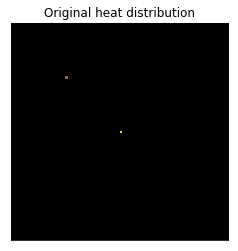

Sequential processing took 4.013963937759399s


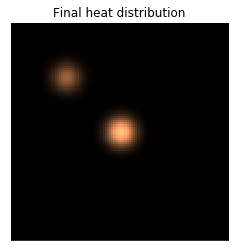

In [7]:
# define integration step sizes
dx = 1
dt = 1

L = 100   # system shape is square for convenience
T = 100   # integration time
D = 0.1   # diffusion constant

# initial heat distribution
grid = np.zeros(2 * [L * int(dx**-1)])
gridsize = grid.shape
grid[int(gridsize[0] / 2), int(gridsize[1] / 2)] = 70   # put a point source in the center, with intensity 70
grid[int(gridsize[0] / 4), int(gridsize[1] / 4)] = 35   # put a point source at a quarter corner, intensity 35


def sequential(grid, T, dt):
    ''' sequential processing solution '''
    ts = time.time()  # measure computation time
    for t in np.arange(T/dt):
        # insert upper and lower boundary: reflecting boundary
        tmp = np.insert(grid, 0, grid[0, :], axis=0)
        tmp = np.vstack((tmp, grid[-1, :]))
        # insert left and right boundary: reflecting boundary
        tmp = np.insert(tmp, 0, tmp[:, 0], axis=1)
        tmp = np.hstack((tmp, np.array([tmp[:, -1]]).T)) # note: slicing gives a row vector therefore transpose to get column vector
        grid = diffusion(D, dt, dx, tmp)
    print('Sequential processing took {}s'.format(time.time() - ts))
    return grid

plt.imshow(grid, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Original heat distribution')
plt.show()
plt.imshow(sequential(grid, T, dt), cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Final heat distribution')
plt.show()

>### Your turn
Time the solution of the problem for different $L$. How do you expect the complexity of the problem to grown with $L$? How does it grow with $L$?

>### Your turn
The code above does two nested `for` loops over the grid. Vectorize the code.

>### Your turn
Explore other initial conditions (absorbing and periodic) and explore how the heat diffuses in this system.

## Multiprocessing module
It is crucial that you read the documentation for this module and understand it well https://docs.python.org/2/library/multiprocessing.html

In [26]:
import multiprocessing as mp

print('Number of processors =' +str(mp.cpu_count()) +'.')

Number of processors =4.


In [28]:
# defining function of integers
def sumnums(nums):
    s = 0
    for x in nums:
        s += x
    return s

maxnum = 2**25    # sum integers up to (not including) this number

if __name__=='__main__':
    # parallel processing
    n_proc = 10
    ts = time.time()  # measure computation time
    pool = mp.Pool(processes = n_proc)    # on my laptop I have 4 cores
    numlist = [range(int(maxnum/n_proc*i), int(maxnum/n_proc*(i+1))) for i in range(n_proc)]   # list of list of chopped up numbers
    subsums = pool.map(sumnums, numlist)
    result_p = sumnums(subsums)
    print('Parallel processing took {}s'.format(time.time() - ts))
    
    # sequential processing
    ts = time.time()  # measure computation time
    result_s = sumnums(range(maxnum))
    print('Sequential processing took {}s'.format(time.time() - ts))
    
    print("sum numbers from 0 to %d - parallel: %d, sequential healthcheck: %d" % (maxnum, result_p, result_s))

Parallel processing took 1.1783909797668457s
Sequential processing took 2.036456823348999s
sum numbers from 0 to 33554432 - parallel: 562949936644096, sequential healthcheck: 562949936644096


### Diffusion on multiple processors
Let's recode the single processor version now on multiple processors instead.

In [29]:
from functools import partial
def parallel(grid, T, dt, units):
    ''' parallel processing solution '''
    # define number of processes
    units = 4
    p = mp.Pool(units)

    # define how many partitions of grid in x and y direction and their length
    (nx, ny) = (int(units / 2), 2)
    lx = int(gridsize[0] / nx)
    ly = int(gridsize[1] / ny)

    # this makes sure that D, dt, dx are the same when distributed over processes
    # for integration, so the only interface parameter that changes is the grid
    func = partial(diffusion, D, dt, dx)
    ts = time.time()  # measure computation time
    for t in np.arange(T/dt):  # note numpy.arange is rounding up floating points
        data = []
        # prepare data to be distributed among workers
        # 1. insert boundary conditions and partition data
        grid = np.insert(grid, 0, grid[0, :], axis=0)       # top
        grid = np.vstack((grid, grid[-1, :]))               # bottom
        grid = np.insert(grid, 0, grid[:, 0], axis=1)       # left
        grid = np.hstack((grid, np.array([grid[:, -1]]).T))   # right
        # partition into subgrids
        for i in range(nx):
            for j in range(ny):
                # subgrid
                subg = grid[i * lx + 1:(i+1) * lx + 1, j * ly + 1:(j+1) * ly + 1]
                subg = np.insert(subg, 0, grid[i * lx, j * ly + 1:(j+1) * ly + 1], axis=0)  # upper subgrid boundary
                subg = np.vstack((subg, grid[(i+1) * lx + 1, j * ly + 1:(j+1) * ly + 1]))  # lower subgrid boundary
                subg = np.insert(subg, 0, grid[i * lx:(i+1) * lx + 2, j * ly], axis=1)  # left subgrid boundary
                subg = np.hstack((subg, np.array([grid[i * lx:(i+1) * lx + 2, (j+1) * ly + 1]]).T))  # right subgrid boundary
                # collect subgrids in list to be distributed over processes
                data.append(subg)
        # 2. divide among workers
        results = p.map(func, data)
        grid = np.vstack([np.hstack((results[i * ny:(i+1) * ny])) for i in range(nx)])
    print('Concurrent processing took {}s'.format(time.time() - ts)) # alternative to write variable to string as used above
    return grid

Sequential processing took 3.694476842880249s


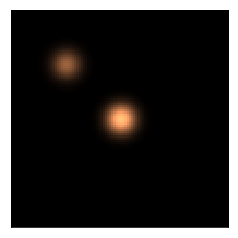

Concurrent processing took 2.124263286590576s


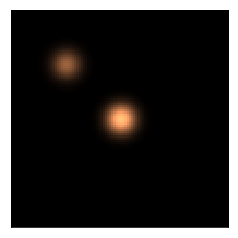

In [30]:
if __name__=='__main__':
    grid_s = np.copy(grid)  # keep original grid variable unchanged
    plt.imshow(sequential(grid_s, T, dt), cmap=plt.cm.copper, extent=[-1,1,-1,1]);
    plt.xticks([]); plt.yticks([]);
    plt.show()
    grid_p = np.copy(grid)  # keep original grid variable unchanged
    plt.imshow(parallel(grid_p, T, dt, 4), cmap=plt.cm.copper, extent=[-1,1,-1,1]);
    plt.xticks([]); plt.yticks([]);
    plt.show()

In [31]:
print('Active children ' +str(mp.active_children()))

Active children [<ForkProcess(ForkPoolWorker-95, started daemon)>, <ForkProcess(ForkPoolWorker-93, started daemon)>, <ForkProcess(ForkPoolWorker-96, started daemon)>, <ForkProcess(ForkPoolWorker-97, started daemon)>, <ForkProcess(ForkPoolWorker-98, started daemon)>, <ForkProcess(ForkPoolWorker-99, started daemon)>, <ForkProcess(ForkPoolWorker-94, started daemon)>, <ForkProcess(ForkPoolWorker-100, started daemon)>, <ForkProcess(ForkPoolWorker-101, started daemon)>, <ForkProcess(ForkPoolWorker-102, started daemon)>]


## Projects

The following three projects are available for this module. For each of these projects, you will need to develop a discretized space model of the process. You will then write code for sequential simulation of the system. Finally you will write code for simulation of the system using a pool of workers of an arbitrary size. In your report, you will need to output (besides the usual verification figures) the movies of the dynamics of the system, and a few snapshots of this dynamics for a more detailed analysis. After that, the final plot should be the time it took to solve the problem vs. the number of workers in the pool, for the number of workers going from 1 to 10 or so. What is the speedup that you observe for a different number of workers?

> ### Project 1: Conway's Game of Life (just fun)
Game of Life is a cellular automaton devised by John Conway, a mathematician, in 1970. The rules of the game are simple:
 - The game is played on a large (potentially infinite) orthogonal grid.
 - The game uses discrete time.
 - Each cell on a grid can be in two states: alive (1) or dead (0).
 - Every cell interacts with 8 of its neighbors to establish if it will be alive or dead at the next time step
 - The transition rules are
    - Any live cell with fewer than two lives neighbors dies (life is cooperative).
    - Any live cell with two or three live neighbors lives.
    - Any live cell with more than three live neighbors dies (overpopulation).
    - Any dead cell with exactly three live neighbors becomes alive (is reproduced into) .
    - All other dead cells remain dead.

> You can read more about the game in __[this Wikipedia article](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)__. Develop a model of the Game on multiple processors (as described above), and simulate it on a large lattice (few hundred by few hundred cells). Start with random initial conditions and see which examples of "living" organisms you can generate. Classify them. Plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool.  

> ### Project 2: Reaction-diffusion in development (biophysics)
A drosophila egg can be represented as an ellipsoid of rotation of about 500 um along the longest diameter, and half as long along the shortest. To start the development of a fertilized egg, a mother fly deposits a mRNA of a certain protein (bicoid) at the tip of the egg. The protein is translated from its mRNA (you should model this as a constant influx of bicoid molecules at the tip of the egg), and starts diffusing over the 3-d volume of the embryo with the diffusion coefficient of about 20 um$^2$/s (though there are complications, and the spread of the molecule is likely not purely diffusional). While the bicoid diffuses, it also degrades with the time scale of about 3 min (again, there are complications). As a result, a gradient of bicoid gets established, and, later in development, different parts of the embryo read out their position inside the embryo by measuring the bicoid concentrations next to them. Simulate the process of establishment of the bicoid gradient on multiple cores. For this, you will need to use not cubic, but ellipsoidal boundaries and set reflecting boundary conditions on them. Still work with a cubic lattice, but make the boundary conditions band elliptical (to the extent that you can on a square lattice). You will also need to supplement every diffusion step with a reaction step accounting for the decay of the bicoid. Produce a movie of the concentration field in the cross-section of the embryo. Graph the concentration along the major axis in steady state. Explore how this concentration depends on the diffusion constant and the decay time. How does the time to the steady state depend on the diffusion constant? Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool.   

> ### <font color=green>Track 2: Project 3: Repressilator (biochemical kinetics)</font>
Recall <font color=green>Track 2: Master Equation and the dynamics of the probability distribution</font> section in Chapter 5, in which we studied how to model the dynamics of probability distributions of a number of molecules. Let's now study a slightly more complicated system of three interacting genes, $A,B,C$, arranged in a logical circle: gene $A$ suppresses $B$, $B$ suppresses $C$, and $C$ suppresses $A$. This is known as the "repressilator* circuit, which was __[developed in *E. coli* by Elowitz and Leibler](http://elowitz.caltech.edu/publications/Repressilator.pdf)__. The deterministic dynamics of this system is governed by the following equations. First, each of the three types of proteins are translated from messenger RNAs (mRNAs) $$\frac{dp_i}{dt}=a m_i-b p_i,$$ where $i=(A,B,C)$, $a$ and $b$ are constant rates, and $p$ and $m$ are protein and mRNA concentrations, respectively. In their turn, the production of mRNA is affected by the proteins that repress them, $$\frac{dm_i}{dt}=\alpha_0+\frac{\alpha}{K^2+p_{i-1}^2}-\beta m_i,$$ where $K,\alpha,\beta$ are constants, and protein species $A-1$ corresponds to $C$. This system is known to develop oscillations, where concentration of each of the proteins go up and down periodically. Write the master equation for this system following the approach we took in Chapter 5, and solve it on multiple cores (the lattice that you will have to build to represent the state of the system will be 6 dimensional: three proteins and three mRNAs). Find parameter values that make the system oscillate (feel free to use the original article by Elowitz and Leibler as an inspiration for parameter values). Show the graphs of the probability distribution $P(p_A)$ as a function of time. Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool. 

> ### <font color=green>Track 2: Project 4: Belousov-Zhabotinsky reaction (chemical physics)</font>
__[Belousov-Zhabotinsky reaction](https://en.wikipedia.org/wiki/Belousov–Zhabotinsky_reaction)__ is a classic example of a nonlinear chemical oscillator based on propagation of waves in excitable media. It's typically modeled as an __[oregonator](https://en.wikipedia.org/wiki/Oregonator)__, with three differential equations describing species X, Y, and Z. Another good introduction is in __[Scholarpedia](http://www.scholarpedia.org/article/Oregonator)__; focus especially on the scaled form in Eqs. (4,5,6)). Now imagine that all species diffuse with similar (but not the same) diffusion constants. Set up such simulations on a square grid in 2d -- you need to keep track of concentration of all three species on every grid point, and, in addition to diffusion, there will be mass-action reactions on every site. Solbe this system using multiple cores and explore various diffusion constants. Find the parameter range at which the system, started with random initial conditions, develops the beautiful spiral waves seen in the first link above? Produce a movie of these waves. Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool. 
